# Project: Investigate a Dataset - [No_show_appointments]  
## Table of Contents
* Introduction  
* Data Wrangling  
* Exploratory Data Analysis  
* Conclusions  

# Introduction   
## Data Description  
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.  
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.  
* ‘Neighborhood’ indicates the location of the hospital.  
* the last column says:‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.  

### Data Columns are:  
'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'


### Question for analysis  
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

# Data Wrangling


In [2]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
#load data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [6]:
df.shape

(110527, 14)

# Data Cleaning

First, we wil check for null values in each column

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It seems that no columns have null values.
The next step, we wil check the duplicate values

In [8]:
df.duplicated().sum()

0

Nice, there are no duplicate values as well. 
Now our data is ready for the next step : EDA.

# Exploratory Data Analysis


I will remove the columns that are not necessary for me.

In [9]:
df.drop(["PatientId", "AppointmentID"], axis= 1, inplace= True)

In [10]:
#check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#rename the column ["No-show"]
df.rename(columns= {"No-show": "no_show"}, inplace= True)

In [12]:
#check
print(df.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'no_show'],
      dtype='object')


I want to take a look in the histograms of all columns.

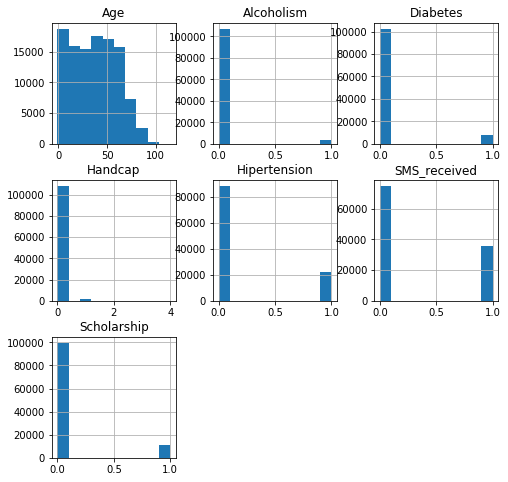

In [13]:
df.hist(figsize= (8,8));

seems to be:  
* most people have scholarship  
* most of them are hypertensive  
* most of them are alcoholics  
* most of them are diabetics  
* nearly all are handcap  
* most of them recieved an SMS  

I wil group the data by: no show into 2 groups. yes: who didn't attend, no: who did attend.

In [14]:
attend = df.query('no_show == "No"')
notattend = df.query('no_show == "Yes"')


### Question 1: Is there a relationship between the gender and the attendence?

Text(0,0.5,'Number')

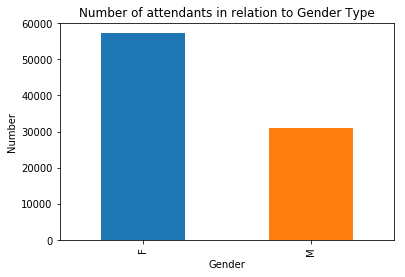

In [15]:
attend["Gender"].value_counts().plot(kind= "bar");
plt.title("Number of attendants in relation to Gender Type")
plt.xlabel("Gender")
plt.ylabel("Number")

Text(0,0.5,'Number')

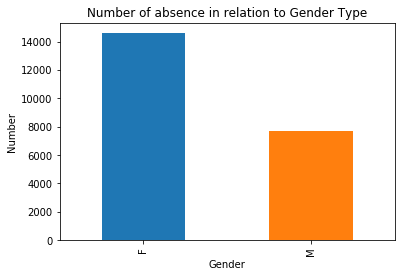

In [16]:
notattend["Gender"].value_counts().plot(kind= "bar");
plt.title("Number of absence in relation to Gender Type")
plt.xlabel("Gender")
plt.ylabel("Number")

Well, it seems like there is no gender tendency, as both attendants and who didn't attend are both females.

### Question 2: Is there a relationship between the scholarship and the attendence?

I will divide the data into 2 groups: either have or don't have scholarship.

In [17]:
havesch = df.query("Scholarship == 1")
nothavesch = df.query("Scholarship == 0")

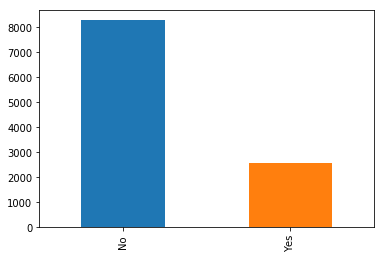

In [18]:
havesch["no_show"].value_counts().plot(kind= "bar");

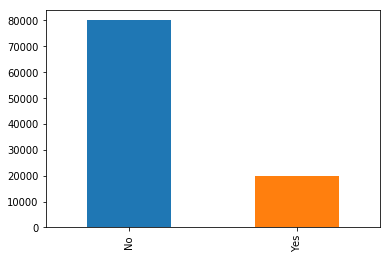

In [19]:
nothavesch["no_show"].value_counts().plot(kind= "bar");

well, it seems that the scholarship is not an effective factor on attendence.

### Question 3: Does age affect attendenc?

Let's see the distribution of age  between the people who attend , and that who did not attend.

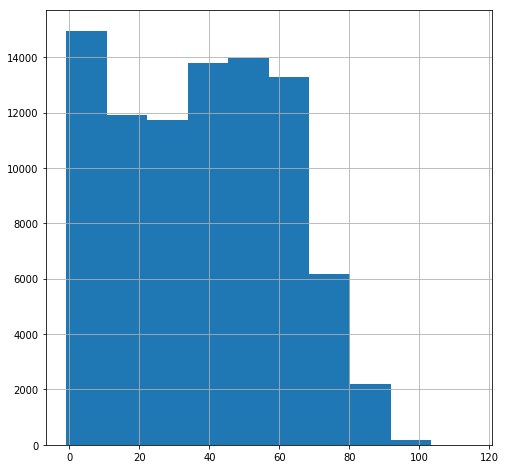

In [20]:
attend["Age"].hist(figsize= (8,8));

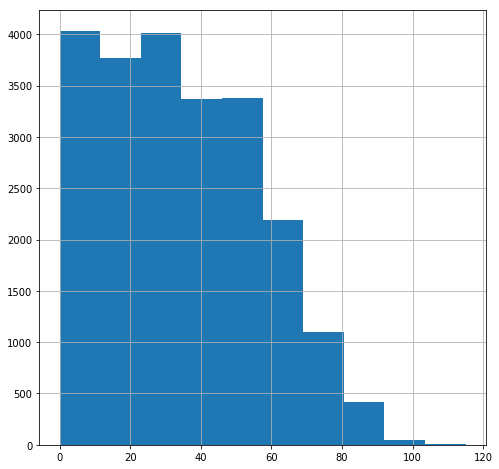

In [21]:
notattend["Age"].hist(figsize= (8,8));

The distribution of age of people who did not attend is more skewed to the right.

Now, I will use some statistics.

In [22]:
#the mean age for those who attend
attend["Age"].mean()

37.790064393252315

In [23]:
#the mean age for those who did not attend
notattend["Age"].mean()

34.317666562121957

In [24]:
#the median age for those who attend
attend["Age"].median()

38.0

In [25]:
#the median age for those who did not attend
notattend["Age"].median()

33.0

So we can say that people who attend the appoinments are a little bit  older.

### Question 4: Is there a relationship between being hypertensive and the propability of attendence?

I will divide the data set into 2 groups: hypertensive and not hypertensive.

In [28]:
hyper = df.query("Hipertension== 1")
nothyper = df.query("Hipertension== 0")

I will calculate the count of hypertensive who attend ans who did not attend.

In [29]:
hyper["no_show"].value_counts()

No     18029
Yes     3772
Name: no_show, dtype: int64

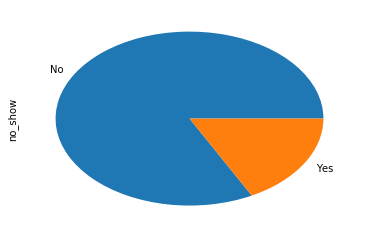

In [30]:
hyper["no_show"].value_counts().plot(kind= "pie");

Then I will calculate the total number of hypertensives.

In [31]:
hyper.shape[0]

21801

I will calculate the proportion of attendence among the hypertensives.

In [32]:
proportion_hyper = 18029 / hyper.shape[0]
proportion_hyper

0.8269804137424889

Now, I wil repeat the previous steps again to get the proportion of attendence among the nothypertensives.

In [33]:
#the number of not hypertensive who attend and did not attend
nothyper["no_show"].value_counts()

No     70179
Yes    18547
Name: no_show, dtype: int64

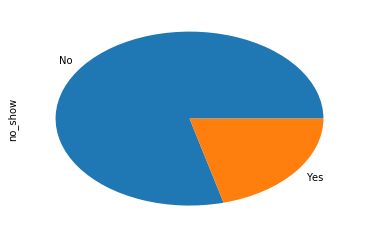

In [34]:
nothyper["no_show"].value_counts().plot(kind= "pie");

In [35]:
#the total number of the not hypertensive
nothyper.shape[0]

88726

In [36]:
#the proportion of attendence among the not hypertensives
proportion_nothyper = 70179 / nothyper.shape[0]
proportion_nothyper

0.7909631900457589

So, it seems that those who are hypertensive attend more than those who are not.

### Question 5: Is there a relationship between being diabetic and the propability of attendence?


I will divide the patients into 2 groups: diabetics and nondiabetics.

In [38]:
diabetics= df.query("Diabetes== 1")
nondiabetics = df.query("Diabetes== 0")

I will calculate the number of diabetics who attend ans who did not attend.

In [40]:
diabetics["no_show"].value_counts()

No     6513
Yes    1430
Name: no_show, dtype: int64

Text(0,0.5,'Number')

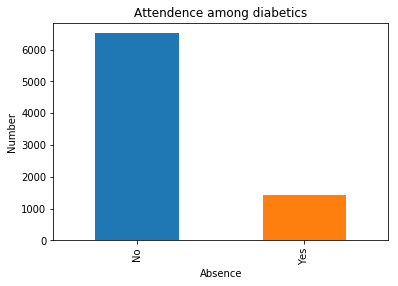

In [41]:
diabetics["no_show"].value_counts().plot(kind= "bar");
plt.title("Attendence among diabetics")
plt.xlabel("Absence")
plt.ylabel("Number")

In [42]:
diabetics.shape[0]

7943

Now, I will calculate the proportion of attendence among diabetics.

In [43]:
proportion_diabetics = 6513 / hyper.shape[0]
proportion_hyper

0.8269804137424889

Now, I will repeat the steps agian to calculate the proportion of attendence among nondiabetics.

In [44]:
#number of nondiabetics who did and did not attend the appointment
nondiabetics["no_show"].value_counts()

No     81695
Yes    20889
Name: no_show, dtype: int64

Text(0,0.5,'Number')

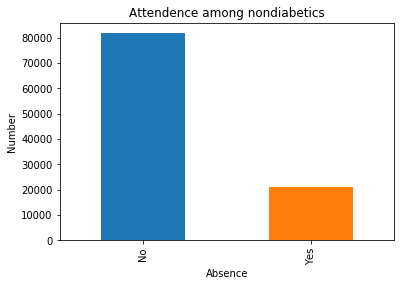

In [45]:
nondiabetics["no_show"].value_counts().plot(kind= "bar");
plt.title("Attendence among nondiabetics")
plt.xlabel("Absence")
plt.ylabel("Number")

In [46]:
#the total number of non-diabetics
nondiabetics.shape[0]

102584

In [47]:
#proportion of attendence among the nondiabetics
proportion_nondiabetics = 81695 / nondiabetics.shape[0]
proportion_nondiabetics

0.7963717538797473

So, it seems that  the diabetics tend to attend more than the non-diabetics.

# Conclusions  
- The gender doesn't affect the attendence.  
- There is no correlation between the attendence and whether the patient has scholarship or not.  
- There is a correlation between age and attendece where older people tend to attend their appoinments.  
- The hypertensives attend more than the not hypertensives.  
- The diabetics attend more than the nondiabetics.  

## Limitaions  
- In this data set there were no missing values or duplicated ones.
- Yet, it needs more research to collect more data and draw more reliable conclusions.  
